<img src="ASSA.jpg" width="240" align="center"/>

# Data-driven Approach and Machine learning techniques
## Exercise 1
### Artificial Neural Network: 1 degree of freedom vibration system 

You are provided with experimental data of a free vibration of a dampled single degree of freedom (DOF) system in the file "*vibration_data_ANN.mat*".

The analytical solution for a free vibrating, damped single DOF system is given by

\begin{equation}
    y\left(t\right)=e^{-D\omega_{0}t}\left(y_{0}\cos\left(\omega_{d}t\right)+\frac{\omega_{0}Dy_{0}}{\omega_{d}}\sin\left(\omega_{d}t\right)\right),
\end{equation}

with the initial displacement $y_{0}$, damping coefficient $D$, frequency $f$, the angular frequency of the undamped system $\omega_{0}$ and the angular frequency of the damped system $\omega_{d}=\sqrt{1-D^{2}}\omega_{0}$.

It is your task to build an Artifical Neural Network (ANN) using a Python library of your choice with the purpose to predict the damped vibration of the single DOF system.

In [2]:
cd Day-3

/Users/arek/Documents/assa/Day-3


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import scipy.io as sio
#from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

%matplotlib inline

In [12]:
tf.__version__

'2.20.0'

For more information on the keras package, see https://keras.io/api/

In [4]:
def groundtruth(t):
    f = 5 # Frequency
    y0 = 10 # Initial displacement
    D = 0.05 # Damping coefficient
    # Generate data of free damped single DOF system
    y_true = np.exp(-D*((2*np.pi*f)/np.sqrt(1-D**2))*t)*(y0*np.cos(2*np.pi*f*t)+(D*y0/(np.sqrt(1-D**2)))*np.sin(2*np.pi*f*t))

    return y_true

**(a)** Pre-process the provided data and randomly split the data set into 70% training and 30% test data.

We define a function to load the given data

In [5]:
def readData(filename):
    vibration_data = sio.loadmat(filename)
    y_data = vibration_data['data']
    y_data = y_data.flatten().reshape(-1, 1)
    t = vibration_data['time']
    t = t.flatten().reshape(-1, 1)

    return y_data, t

and read the registered displacement at the given time steps.

In [194]:
y, t = readData('vibration_data_ANN.mat')

In [16]:
y.shape, t.shape

((100, 1), (100, 1))

Then, we split the given data into a training and a test set

In [195]:
y_train, y_test, t_train, t_test = train_test_split(y, t, test_size=0.3)

and visualize the data (and the underlying ground truth).

In [8]:
# Evaluate true function
t_true = np.linspace(0, 2, 1000).reshape(-1,1)
y_true = groundtruth(t_true).reshape(-1,1)

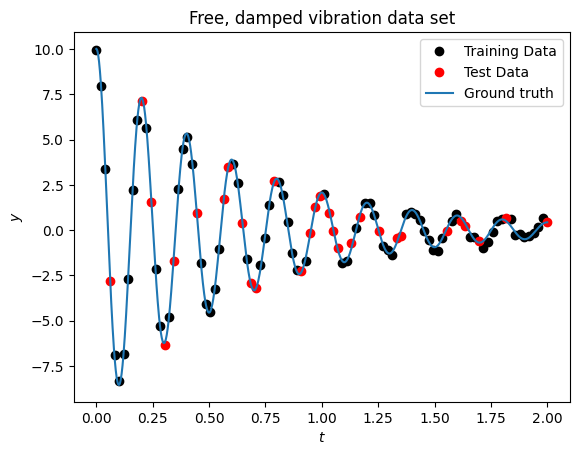

In [9]:
# Visualize data sets
plt.figure(1)
plt.plot(t_train, y_train, 'ko', label='Training Data')
plt.plot(t_test, y_test, 'ro', label='Test Data')
plt.plot(t_true, y_true, label='Ground truth')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Free, damped vibration data set')
plt.legend()
plt.show()

**(b)** Implement an ANN with a suitable network architecture. Put special emphasis on the choice of the activation functions.

**Question**: What activation functions are you familiar with?

Here, we use keras' Sequential API and design a fully connected (dense) network with three hidden layers.

In [10]:
def build_model(activation):
    
    model = keras.Sequential()
    # Three hidden layers
    model.add(layers.Dense(20, input_shape=(1,), activation=activation))
    model.add(layers.Dense(20, activation=activation))
    model.add(layers.Dense(20, activation=activation))
    # Output layer (linear activation function)
    model.add(layers.Dense(1))

    model.summary()

    # Mean Squared Error (MSE) loss function, Adam optimizer
    model.compile(loss='mean_squared_error', optimizer="Adam", metrics=['mean_squared_error'])
    
    return model

**(c)** Train the ANN with your chosen network architecture and predict the response of the free vibration.

In [ ]:
%%time
# Training of the ANN
number_epochs = 1000
batch_size = len(t_train)

model_relu = build_model('sigmoid')
history_relu = model_relu.fit(t_train, y_train, epochs=number_epochs, verbose=0, batch_size=batch_size, validation_data=(t_test, y_test))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 851ms/step - loss: 9.7237 - mean_squared_error: 9.7237 - val_loss: 5.5569 - val_mean_squared_error: 5.5569
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.7029 - mean_squared_error: 9.7029 - val_loss: 5.5354 - val_mean_squared_error: 5.5354
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 9.6835 - mean_squared_error: 9.6835 - val_loss: 5.5153 - val_mean_squared_error: 5.5153
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 9.6656 - mean_squared_error: 9.6656 - val_loss: 5.4966 - val_mean_squared_error: 5.4966
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 9.6490 - mean_squared_error: 9.6490 - val_loss: 5.4794 - val_mean_squared_error: 5.4794
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - loss: 9.6339 - mean_squared_error: 9.6339 - val_loss: 5.4637 - val_mean_squared_error: 5.4637
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 9.6203 - mean_squared_error: 9.6203 - val_loss: 5.4494 - 

Now, we can predict the response of the vibration using the trained ANN

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


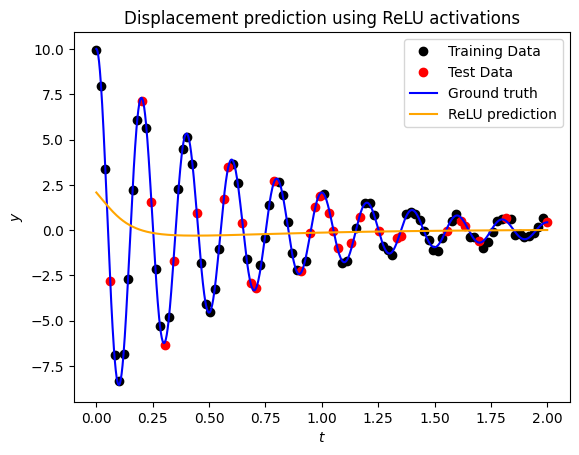

In [23]:
# Prediction of the vibration using the ANN
t_pred = np.linspace(0,2,1000)

y_pred_relu = model_relu.predict(t_pred)
plt.figure()
plt.plot(t_train, y_train, 'ko', label='Training Data')
plt.plot(t_test, y_test, 'ro', label='Test Data')
plt.plot(t_true, y_true, 'b-',label='Ground truth')
plt.plot(t_pred, y_pred_relu,color='orange', label='ReLU prediction')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Displacement prediction using ReLU activations')
plt.legend()
plt.show()

and **(d)** Quantify the performance of the ANN based on the test data set

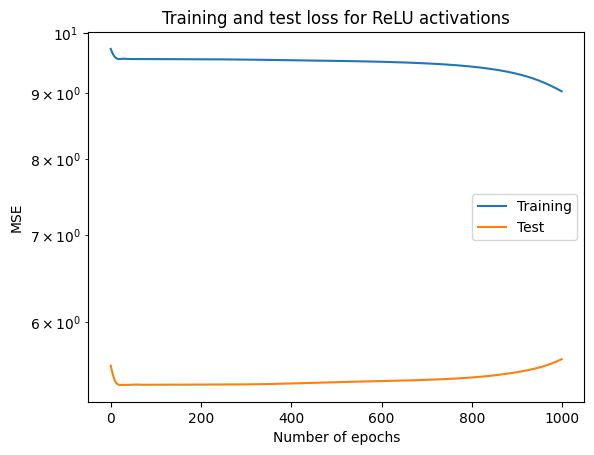

In [24]:
def plot_model_loss(history,title):
    fig, ax = plt.subplots()
    ax.plot(history.history['loss'], label = 'Training')
    ax.plot(history.history['val_loss'], label = 'Test')
    plt.xlabel('Number of epochs')
    plt.ylabel('MSE')
    plt.yscale('log')
    plt.title('Training and test loss for %s activations' %title)
    plt.legend()
    plt.show()
    
plot_model_loss(history_relu,'ReLU')

and also validate the prediction against the analytic solution using the mean squared error (MSE).

In [25]:
MSE = np.mean(np.square(y_pred_relu - y_true))
print("MSE using ReLU activations =", MSE)

MSE using ReLU activations = 7.925240530432419


### Are the more appropriate activation functions?

#### What about using *tanh* activation?

We keep the network architecture and replace the *ReLU* activations with *tanh* activations, train that model

In [26]:
model_tanh = build_model('tanh')
history_tanh = model_tanh.fit(t_train, y_train, epochs=number_epochs, verbose=0, batch_size=batch_size, validation_data=(t_test, y_test))

/opt/miniconda3/envs/assa_env/lib/python3.12/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

and evaluate the network's performance with respect to the test data and its capability to provide an accurate prediction of the vibration.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


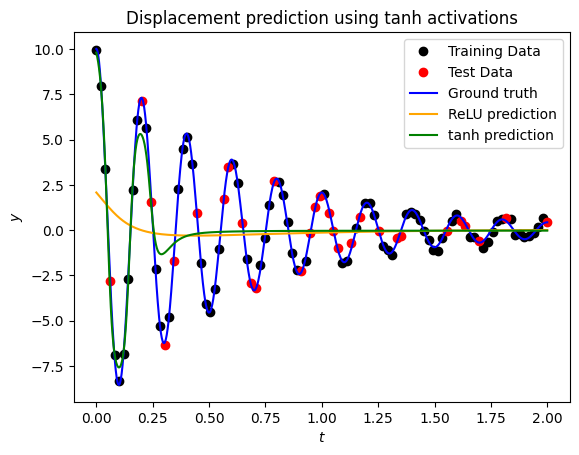

In [27]:
y_pred_tanh = model_tanh.predict(t_pred)
plt.figure()
plt.plot(t_train, y_train, 'ko', label='Training Data')
plt.plot(t_test, y_test, 'ro', label='Test Data')
plt.plot(t_true, y_true, 'b-',label='Ground truth')
plt.plot(t_pred, y_pred_relu,color='orange', label='ReLU prediction')
plt.plot(t_pred, y_pred_tanh,color='green', label='tanh prediction')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Displacement prediction using tanh activations')
plt.legend()
plt.show()

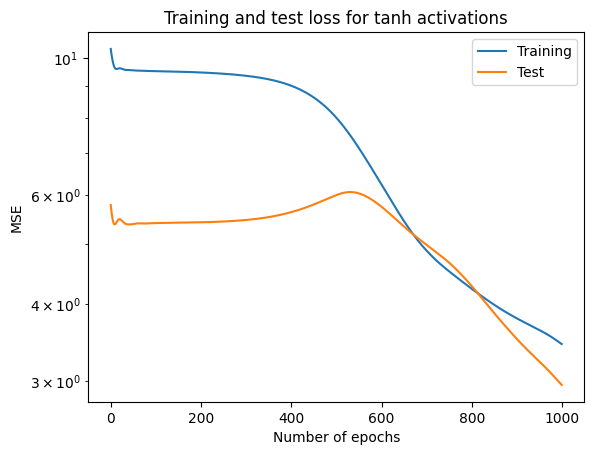

In [28]:
plot_model_loss(history_tanh,'tanh')

In [29]:
MSE = np.mean(np.square(y_pred_tanh - y_true))
print("MSE using tanh activations =", MSE)

MSE using tanh activations = 3.391475491815372


#### Or an activation function, that is motivated by the underlying physics? What about using sine activation?

We keep the network architecture and replace the *tanh* activations with *sine* activations, train that model

In [201]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(t_train, y_train, t_test, y_test):
    # Normalizuj dane wejściowe
    scaler_t = StandardScaler()
    scaler_y = StandardScaler()
    
    t_train_scaled = scaler_t.fit_transform(t_train)
    t_test_scaled = scaler_t.transform(t_test)
    
    y_train_scaled = scaler_y.fit_transform(y_train)
    y_test_scaled = scaler_y.transform(y_test)
    
    return t_train_scaled, y_train_scaled, t_test_scaled, y_test_scaled, scaler_t, scaler_y

# Użyj znormalizowanych danych
t_train_norm, y_train_norm, t_test_norm, y_test_norm, scaler_t, scaler_y = preprocess_data(
    t_train, y_train, t_test, y_test
)

In [227]:
def build_model(activation):
    
    model = keras.Sequential()
    # Three hidden layers
    model.add(layers.Dense(20, input_shape=(1,), activation=activation))
    model.add(layers.Dense(20, activation=activation))
    model.add(layers.Dense(20, activation=activation))
    # Output layer (linear activation function)
    model.add(layers.Dense(1))

    model.summary()
    # Mean Squared Error (MSE) loss function, Adam optimizer with adaptive learning rate
    model.compile(loss='mean_squared_error', 
                  optimizer=keras.optimizers.Adam(learning_rate=keras.optimizers.schedules.ExponentialDecay(
                      initial_learning_rate=0.2,
                      decay_steps=200,
                      decay_rate=0.1)), 
                  metrics=['mean_squared_error'])
    
    return model

In [233]:
number_epochs=500
batch_size=70

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=50, 
    restore_best_weights=True
)

model_sine = build_model(tf.math.sin)
history_sine = model_sine.fit(
    t_train, y_train, epochs=number_epochs, verbose=0, batch_size=batch_size, 
    validation_data=(t_test, y_test), 
    # callbacks=[early_stopping]
)

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_225 (Dense)               │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_226 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_227 (Dense)               │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_228 (Dense)               │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

and evaluate this network's performance with respect to the test data and its capability to provide an accurate prediction of the vibration.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step


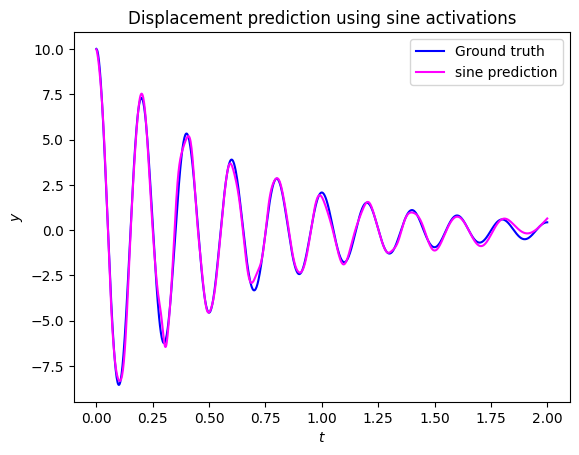

In [237]:
y_pred_sine = model_sine.predict(t_pred)
plt.figure()
# plt.plot(t_train, y_train, 'ko', label='Training Data')
# plt.plot(t_test, y_test, 'ro', label='Test Data')
plt.plot(t_true, y_true, 'b-',label='Ground truth')
# plt.plot(t_pred, y_pred_relu,color='orange', label='ReLU prediction')
# plt.plot(t_pred, y_pred_tanh,color='green', label='tanh prediction')
plt.plot(t_pred, y_pred_sine,color='magenta', label='sine prediction')
plt.xlabel('$t$')
plt.ylabel('$y$')
plt.title('Displacement prediction using sine activations')
plt.legend()
plt.show()

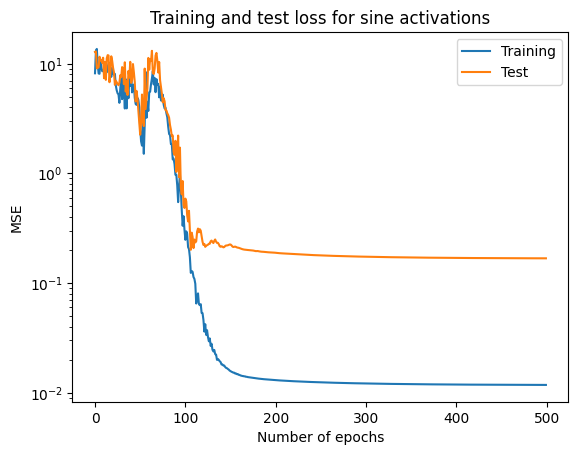

In [238]:
plot_model_loss(history_sine,'sine')

In [239]:
MSE = np.mean(np.square(y_pred_sine - y_true))
print("MSE using sine activations =", MSE)

MSE using sine activations = 0.06708156966421523
